In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
df = pd.read_excel('Book1.xlsx')
print(df.head())

   Crime_ID Crime_Type   Location       Date      Time  Victim_Age  \
0      1001   Burglary   Shenzhen 2024-01-01  00:00:00          63   
1      1002      Fraud      Wuhan 2024-01-01  00:01:00          47   
2      1003   Burglary    Beijing 2024-01-01  00:02:00          57   
3      1004    Assault  Chongqing 2024-01-02  00:04:00          35   
4      1005    Assault   Shenzhen 2024-01-02  00:05:00          68   

   Suspect_Age Weapon_Used   Latitude   Longitude  
0           30     Unknown  27.490802  103.702659  
1           59     Unknown  39.014286  110.838019  
2           20     Unknown  34.639879  117.458917  
3           26       Knife  31.973170  114.644498  
4           29         NaN  23.120373  116.131223  


In [41]:
df['Weapon_Used'].fillna('Unknown')
weapon_distribution = df['Weapon_Used'].value_counts()
print(weapon_distribution)

Weapon_Used
Knife      232
Unknown    211
Bat        193
Gun        166
Name: count, dtype: int64


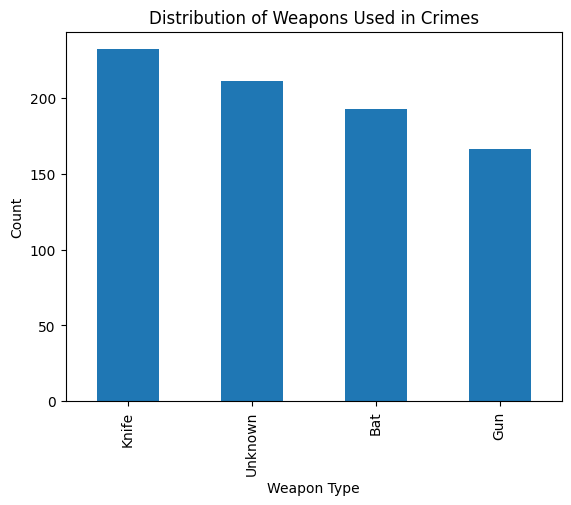

In [42]:
weapon_distribution.plot(kind='bar', title='Distribution of Weapons Used in Crimes')
plt.xlabel('Weapon Type')
plt.ylabel('Count')
plt.show()

In [43]:
weapon_crime_type = df.groupby('Crime_Type')['Weapon_Used'].value_counts()
print(weapon_crime_type)

Crime_Type  Weapon_Used
Assault     Knife          44
            Unknown        40
            Bat            31
            Gun            27
Burglary    Knife          52
            Unknown        45
            Gun            37
            Bat            36
Fraud       Unknown        48
            Bat            43
            Knife          43
            Gun            31
Theft       Bat            48
            Knife          44
            Unknown        37
            Gun            35
Vandalism   Knife          49
            Unknown        41
            Gun            36
            Bat            35
Name: count, dtype: int64


In [44]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print(df.isnull().sum())

Crime_ID         0
Crime_Type       0
Location         0
Date             0
Time             0
Victim_Age       0
Suspect_Age      0
Weapon_Used    198
Latitude         0
Longitude        0
dtype: int64


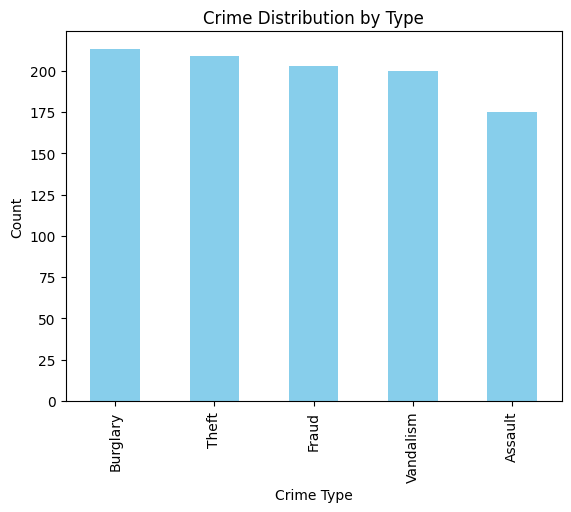

In [45]:
crime_counts = df['Crime_Type'].value_counts()
crime_counts.plot(kind='bar', title='Crime Distribution by Type', color='skyblue')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.show()

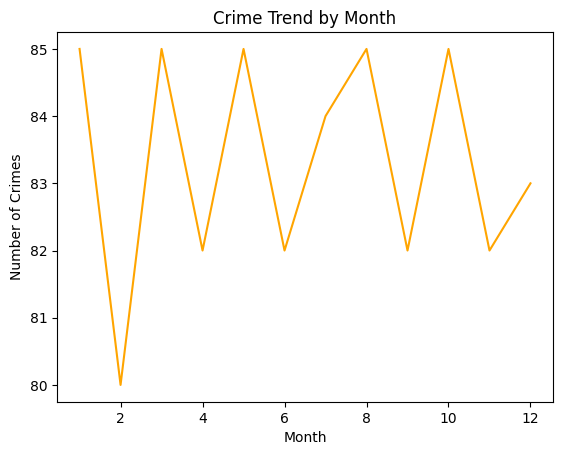

In [46]:
df['Month'] = df['Date'].dt.month
monthly_crime_trend = df.groupby('Month')['Crime_ID'].count()
monthly_crime_trend.plot(kind='line', title='Crime Trend by Month', color='orange')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

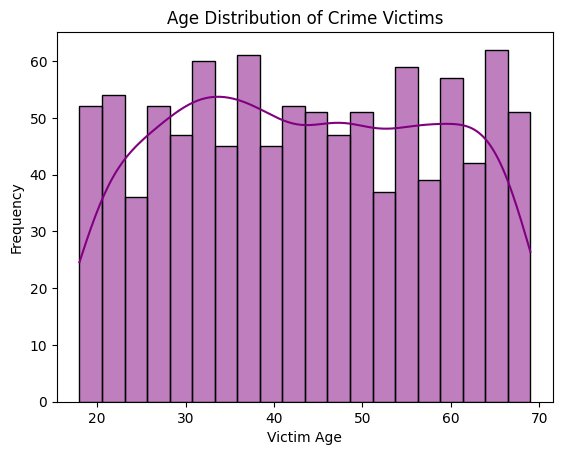

In [47]:
sns.histplot(df['Victim_Age'], bins=20, kde=True, color='purple')
plt.title('Age Distribution of Crime Victims')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.show()

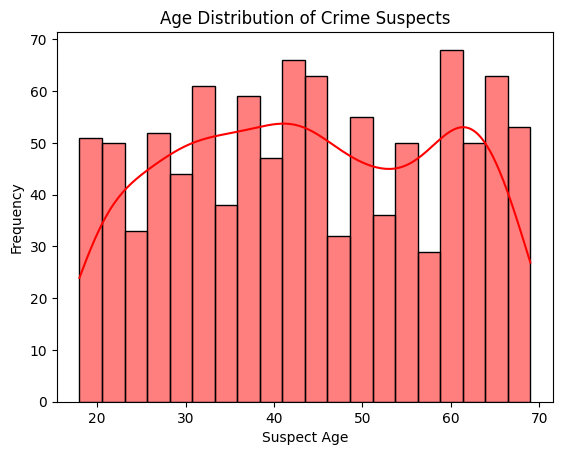

In [48]:
sns.histplot(df['Suspect_Age'], bins=20, kde=True, color='red')
plt.title('Age Distribution of Crime Suspects')
plt.xlabel('Suspect Age')
plt.ylabel('Frequency')
plt.show()

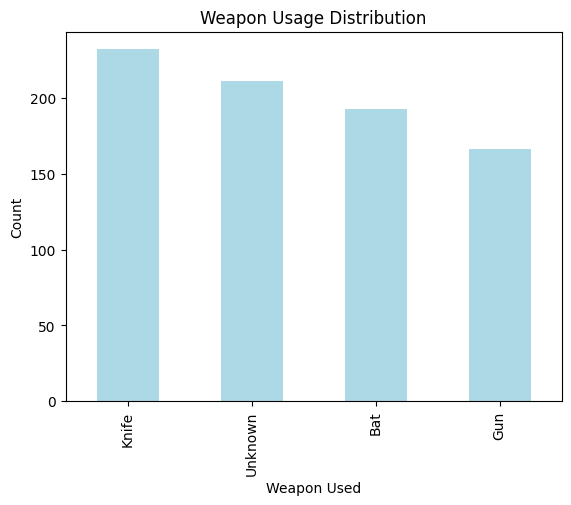

In [49]:
weapon_usage = df['Weapon_Used'].value_counts()
weapon_usage.plot(kind='bar', title='Weapon Usage Distribution', color='lightblue')
plt.xlabel('Weapon Used')
plt.ylabel('Count')
plt.show()

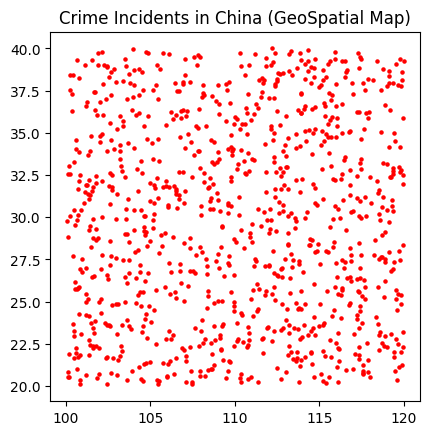

In [50]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.plot(marker='o', color='red', markersize=5)
plt.title('Crime Incidents in China (GeoSpatial Map)')
plt.show()

In [51]:
crime_locations = df[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(crime_locations)

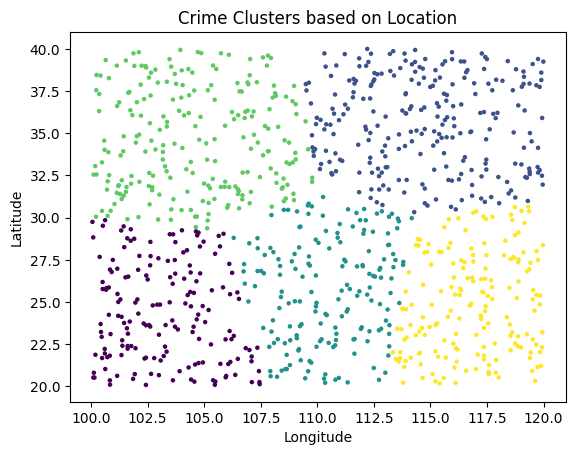

In [52]:
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', s=5)
plt.title('Crime Clusters based on Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [53]:
features = ['Latitude', 'Longitude', 'Victim_Age', 'Suspect_Age', 'Month']
X = df[features]
y = df['Crime_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 7 17  5 12 12]
 [12 13  9 15 14]
 [ 8 13 13 18 12]
 [ 9 18 10 15 14]
 [ 7 16 12 10  9]]
              precision    recall  f1-score   support

     Assault       0.16      0.13      0.15        53
    Burglary       0.17      0.21      0.19        63
       Fraud       0.27      0.20      0.23        64
       Theft       0.21      0.23      0.22        66
   Vandalism       0.15      0.17      0.16        54

    accuracy                           0.19       300
   macro avg       0.19      0.19      0.19       300
weighted avg       0.19      0.19      0.19       300



In [55]:
crime_images = ['https://sampleurl.com/crime_image_{}.jpg'.format(i) for i in range(1, 1001)]
df['Crime_Image_URL'] = crime_images

In [56]:
processed_file_path = "processed_china_crime_data.xlsx"
df.to_excel(processed_file_path, index=False)

In [57]:
print(f"Processed data saved to {processed_file_path}")

Processed data saved to processed_china_crime_data.xlsx


In [58]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

In [59]:
df = pd.read_excel("processed_china_crime_data.xlsx")

In [60]:
app = Dash(__name__)

In [61]:
app.layout = html.Div([
    html.H1("Crime Dashboard"),
    
    # Dropdown to select Crime Type
    dcc.Dropdown(
        id='crime-type-dropdown',
        options=[{'label': crime, 'value': crime} for crime in df['Crime_Type'].unique()],
        value=df['Crime_Type'].unique()[0],  # Default value
        multi=False,
        placeholder="Select Crime Type"
    ),
    
    # Dropdown to select the attribute to visualize on x-axis
    dcc.Dropdown(
        id='x-axis-dropdown',
        options=[
            {'label': 'Date', 'value': 'Date'},
            {'label': 'Victim Age', 'value': 'Victim_Age'},
            {'label': 'Suspect Age', 'value': 'Suspect_Age'},
            {'label': 'Weapon Used', 'value': 'Weapon_Used'},
            {'label': 'Month', 'value': 'Month'}  # If you extracted Month earlier
        ],
        value='Date',  # Default value
        multi=False,
        placeholder="Select x-axis attribute"
    ),
    
    # Graph to display the results
    dcc.Graph(id='crime-graph')
])

In [62]:
@app.callback(
    Output('crime-graph', 'figure'),
    [Input('crime-type-dropdown', 'value'),
     Input('x-axis-dropdown', 'value')]
)
def update_graph(selected_crime, selected_x):
    filtered_data = df[df['Crime_Type'] == selected_crime]
    
    # Plotting based on selected x-axis attribute
    if selected_x == 'Date':
        fig = px.histogram(filtered_data, x='Date', title=f'Crimes over Time for {selected_crime}', nbins=30)
    else:
        fig = px.histogram(filtered_data, x=selected_x, title=f'Distribution of {selected_x} for {selected_crime}')
    
    return fig

In [63]:
if __name__ == '__main__':
    app.run_server(debug=True)